In [8]:
import pandas as pd
a = pd.read_csv("/content/Marvel Vs DC.csv")
print(a)

        ID                              Movie         Year  \
0        0                           Eternals        -2021   
1        1                               Loki     (2021– )   
2        2  The Falcon and the Winter Soldier        -2021   
3        3                        WandaVision        -2021   
4        4            Spider-Man: No Way Home        -2021   
...    ...                                ...          ...   
1685  1685           DC's Legends of Tomorrow     (2016– )   
1686  1686                          Supergirl  (2015–2021)   
1687  1687                          Supergirl  (2015–2021)   
1688  1688                          Supergirl  (2015–2021)   
1689  1689                          Supergirl  (2015–2021)   

                         Genre  RunTime Rating          Director  \
0       Action,Adventure,Drama      NaN    NaN         ChloéZhao   
1     Action,Adventure,Fantasy      NaN    NaN               NaN   
2       Action,Adventure,Drama   50 min  TV-14     

In [9]:
a.isnull().sum()


ID                0
Movie             0
Year             33
Genre             7
RunTime         283
Rating          227
Director        216
Actor            30
Description       0
IMDB_Score      204
Metascore      1625
USA_Gross      1626
Category          0
Votes           204
dtype: int64

In [22]:
a["Year"]=a["Year"].fillna("0")
a["Genre"]=a["Genre"].fillna("0")
a["RunTime"]=a["RunTime"].fillna("0")
a["Rating"]=a["Rating"].fillna("0")
a["Directore"]=a["Director"].fillna("0")
a["Actor"]=a["Actor"].fillna("0")
a["IMDB_Score"]=a["IMDB_Score" ].fillna(0)
a["Metascore"]=a["Metascore"].fillna(0)
a["USA_Gross"]=a["USA_Gross"].fillna(0)
a["Votes"]=a["Votes"].fillna(0)

In [20]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
a["Genre"]=b.fit_transform(a["Genre"])
a["RunTime"]=b.fit_transform(a["RunTime"])
a["Rating"]=b.fit_transform(a["Rating"])
a["Director"]=b.fit_transform(a["Director"])
a["Actor"]=b.fit_transform(a["Actor"])
a["Movie"]=b.fit_transform(a["Movie"])
a["Description"]=b.fit_transform(a["Description"])
a["Category"]=b.fit_transform(a["Category"])
a["Year"]=b.fit_transform(a["Year"])
a["IMDB_Score"]=b.fit_transform(a["IMDB_Score"])
a["Metascore"]=b.fit_transform(a["Metascore"])
a["USA_Gross"] = pd.to_numeric(a["USA_Gross"], errors='coerce').astype('Int64')
a["USA_Gross"]=b.fit_transform(a["USA_Gross"])
a["Votes"] = pd.to_numeric(a["Votes"], errors='coerce').astype('Int64')
a["Votes"]=b.fit_transform(a["Votes"])
a["Director"]=b.fit_transform(a["Director"])

In [23]:
print(a)

        ID  Movie  Year  Genre  RunTime  Rating  Director  Actor  Description  \
0        0    162   144      5        0       0        68     21         1254   
1        1    221    98      6        0       0       431    706           91   
2        2    300   144      5       83       9       431     28          602   
3        3    342   144     11       68      12       431    173          397   
4        4    267   144      7        0       0       207     22           22   
...    ...    ...   ...    ...      ...     ...       ...    ...          ...   
1685  1685     14    82      5       74       9       148     50         1545   
1686  1686     49    78      5       74      12        63    487          711   
1687  1687     49    78      5       74      12         9    487          778   
1688  1688     49    78      5       74      12       365    487          776   
1689  1689     49    78      5       74      12        31    487         1080   

      IMDB_Score  Metascore

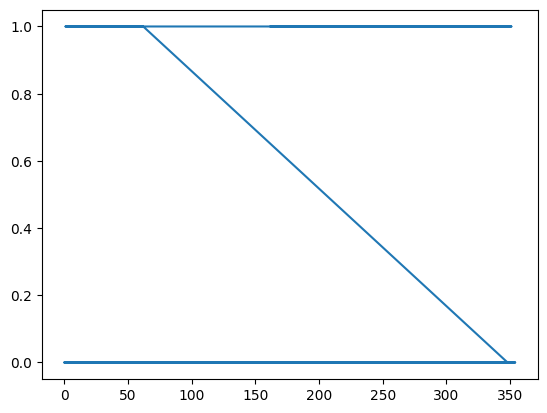

In [24]:
from matplotlib import pyplot as plt
plt.plot(a["Movie"],a["Category"])

In [28]:
x=a.drop("Rating",axis=1)
y=a["Rating"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)
print(xtrain)
print(ytrain)

        ID  Movie  Year  Genre  RunTime  Director  Actor  Description  \
1073  1073     31    41     33       54       359    632          714   
791    791     28    28     32       58        92    366         1509   
860    860     28    28     32       54        62    366         1166   
1149  1149     47    29     29       74       402    712         1118   
1402  1402     13    76     48        0       183    816          240   
...    ...    ...   ...    ...      ...       ...    ...          ...   
0        0    162   144      5        0        68     21         1254   
652    652      7    12     32       54        92    356          322   
1508  1508     19    71     14       75       230     44          409   
662    662      7    12     32       54       116    332         1465   
67      67    317    95     76       44       143    827         1126   

      IMDB_Score  Metascore  USA_Gross  Category  Votes  Directore  
1073          45          0          0         0      

In [33]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
data=br.predict(xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
data=br.predict([[1690,400,124,99,10,20,150,2000,2000,60,50,70,0,100]])
print("Data =",data)

Data = [12]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.metrics import confusion_matrix
ypred=br.predict(xtest)
print(confusion_matrix(ytest,ypred))

[[30  0  0  1  0  1  0  0  0  0  0  1  6  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  6  0  1  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  2  5  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  2  2  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0 45  0  1 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  0  0  4  0  0  2  1  0  0]
 [ 2  0  0  3  1  0  0  0 19  0  2 75 10  0  1]
 [ 1  0  0  1  1  0  0  0  1  0  0  8 31  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 13  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0 19]]


In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.6242603550295858


In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        39
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.55      0.60      0.57        10
           5       0.00      0.00      0.00         2
           6       0.38      0.50      0.43        10
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1
           9       0.61      0.68      0.64        66
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         8
          12       0.62      0.66      0.64       113
          14       0.61      0.72      0.66        43
          15       0.00      0.00      0.00        16
          16       0.95      0.95      0.95        20

    accuracy                           0.62       338
   macro avg       0.30      0.33      0.31       338
weighted avg       0.58   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
